In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
npy_dir = '../../dataset/image_formation/20231007/npy_data'

# sample_pts = np.array([[10 + i*120, 50 + j*51] for j in range(10) for i in range(8)])
sample_pts = np.array([[10 + i*60, 50 + j*51] for j in range(10) for i in range(15)])
sample_pts_flatt = np.array([[sample_pts[i,0]+sample_pts[i,1]*890] for i in range(sample_pts.shape[0])]).squeeze()

wvl_list = np.array([430, 600, 610, 620, 640, 650, 660])
cam_H, cam_W = 580, 890
idx_list = np.array([3 + 8*i for i in range(10)])

## Max datas & Peak illum index

In [4]:
# PDG graph for each wavelength
max_data_front = np.load(os.path.join(npy_dir, 'max_data_front.npy'))
max_data_mid = np.load(os.path.join(npy_dir, 'max_data_mid.npy'))
max_data_mid2 = np.load(os.path.join(npy_dir, 'max_data_mid2.npy'))
max_data_mid3 = np.load(os.path.join(npy_dir, 'max_data_mid3.npy'))
max_data_back = np.load(os.path.join(npy_dir, 'max_data_back.npy'))

In [5]:
# peak illumination index for 5 different depth
front_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_front.npy'))
mid_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid.npy'))
mid2_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid2.npy'))
mid3_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid3.npy'))
back_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_back.npy'))

In [6]:
max_data_mid2.shape

(7, 318, 516200)

In [7]:
# for i in range(len(sample_pts_flatt)):
#     plt.figure(figsize=(5,3))
#     plt.plot(max_data_mid2[0,:,sample_pts_flatt[i]]), plt.title('%02d point'%i)

### Masking code

In [ ]:
# w_idx = 2
# max_data_front_cp = max_data_back.copy()   
     
# medians = np.median(max_data_front_cp, axis=1)  # Find median along the second axis for each pixel and wavelength

# mask1 = (medians > 0.07) & (medians < 0.09)
# mask2 = medians >= 0.09
# mask3 = np.min(max_data_front_cp, axis=1) <= 0.06

# # Adjusting the masks to match the shape of max_data
# mask1 = mask1[:, np.newaxis, :]
# mask2 = mask2[:, np.newaxis, :]
# mask3 = mask3[:, np.newaxis, :]

# # Further broadcast the masks to the shape of max_data
# mask1_broadcasted = np.repeat(mask1, 318, axis=1)
# mask2_broadcasted = np.repeat(mask2, 318, axis=1)
# mask3_broadcasted = np.repeat(mask3, 318, axis=1)

# # Applying the conditions to update max_data
# max_data_front_cp[mask1_broadcasted] -= 0.02
# max_data_front_cp[mask2_broadcasted] -= 0.03
# max_data_front_cp[mask3_broadcasted] += 0.008
        
# for idx, i in enumerate(sample_pts_flatt):
    # if idx in idx_list:
    #     plt.figure(figsize=(5,3))
    #     plt.ylim([0,0.08])
    #     if (np.median(max_data_front_cp[w_idx,:,i]) > 0.07) and (np.median(max_data_front_cp[w_idx,:,i]) < 0.09):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.02
    #     if (np.median(max_data_front_cp[w_idx,:,i]) >= 0.09):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.03
    #     if(max_data_front_cp[w_idx,:,i].min() <= 0.06):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] + 0.008

        # plt.plot(max_data_front_cp[w_idx,:,i]), plt.title(idx)

### Debug

In [ ]:
max_data_front.shape, front_peak_illum_idx.shape

((7, 318, 516200), (3, 7, 516200))

In [ ]:
# for idx, i in enumerate(sample_pts_flatt):
#     for w_idx, w in enumerate(wvl_list):
#         plt.figure()
#         plt.plot(max_data_front[w_idx,:,i]), plt.title('%dnm %d-th sample point, zero %d, minus %d, plus %d' %(w, idx, front_peak_illum_idx[1,w_idx,i], front_peak_illum_idx[0,w_idx,i], front_peak_illum_idx[2,w_idx,i]))

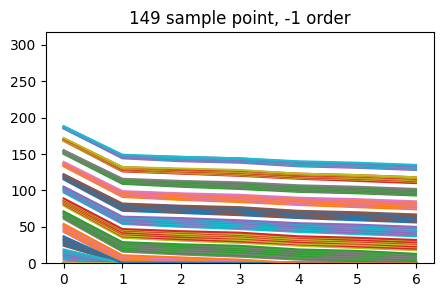

In [ ]:
plt.figure(figsize=(5,3))
for idx, i in enumerate(sample_pts_flatt):
        plt.ylim([0,317])
        # plt.plot(back_peak_illum_idx[2,:,i]), plt.title('%d sample point, +1 order'%idx)
        plt.plot(back_peak_illum_idx[0,:,i]), plt.title('%d sample point, -1 order'%idx)
        # plt.plot(back_peak_illum_idx[1,:,i]), plt.title('%d sample point, 0 order'%idx)

#### Peak illum index Plotting

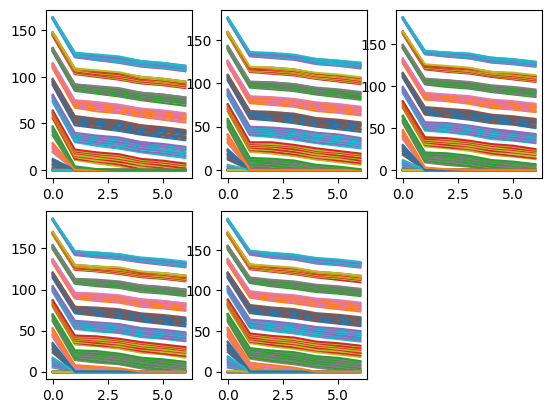

In [ ]:
m_idx = 0
for i in range(len(sample_pts)):
    plt.subplot(231), plt.plot(front_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(232), plt.plot(mid_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(233), plt.plot(mid2_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(234), plt.plot(mid3_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(235), plt.plot(back_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])

## Depth Interpolation

### Depth interpolation linear / non-linear

In [7]:
all_position_peak_illum_idx = np.stack((front_peak_illum_idx, mid_peak_illum_idx, mid2_peak_illum_idx, mid3_peak_illum_idx, back_peak_illum_idx), axis = 0)

In [8]:
def get_depth(position):
        """
            bring depth values (mm) for each spectralon position
        """
        
        to_depth_dir = "../../dataset/image_formation/2023%s/%s_depth/spectralon"

        depth_dir = os.path.join(to_depth_dir%("1007", position), "2023%s_spectralon_%s.npy"%("1007", position))
        depth = np.load(depth_dir)[:,:,2].reshape(580 * 890) # only get z(=depth) value

        return depth

In [9]:
positions = ["front", "mid","mid2","mid3", "back"]
depth = np.array([get_depth(position) for position in positions]) * 1e+3

### Depth fitting

In [ ]:
def fitting_function(x, a, b, c):
        """
            non-linear fitting function
        """
        return a*(x**b) + c

In [ ]:
from scipy.optimize import curve_fit

m_list = np.array([-1, 0, 1])

depth_start = 600
depth_end = 900

depth_arange = np.arange(depth_start, depth_end + 1, 1)

# m = 0
# w = 1
# # i = sample_pts_flatt[2]
# i = 135650

depth_peak_illum_idx = np.zeros(shape=(len(depth_arange), len(m_list), len(wvl_list), len(sample_pts_flatt)))
depth_peak_illum_idx_linear = np.zeros(shape=(len(depth_arange), len(m_list), len(wvl_list), len(sample_pts_flatt)))

for m in range(len(m_list)):
        for w in range(len(wvl_list)): 
            for idx, i in enumerate(sample_pts_flatt):  
                depth_range = np.round(np.array([depth[p,i] for p in range(5)])).astype(np.int32)
                                
                # non linear fitting
                if all_position_peak_illum_idx[:,m,w,i].mean() < 1 : 
                    all_position_peak_illum_idx[:,m,w,i] = np.array([0, 0, 0, 0, 0])
                
                cnt_317 = np.count_nonzero(all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten().astype(np.int16) == 317)

                if (1< cnt_317 < 4):
                    final_depth = np.zeros(shape=(301,))
                    
                    total_cnt = cnt_317
                    
                    depth_range = depth_range[:(len(positions) - (total_cnt -1))]
                    idx_start = np.where(new_depth_range == depth_start)[0][0]
                    
                    y_val = all_position_peak_illum_idx[:,m,w,i].flatten()
                    y_val = y_val[:(len(positions) - (total_cnt -1))]
                    new_depth_range = np.arange(depth_range[0], depth_range[-1] + 1, 1) 
                    
                    params, cov = curve_fit(fitting_function, depth_range, y_val, maxfev = 500000)
                    interp_depth = fitting_function(new_depth_range, *params)
                    
                    if depth_range[-1] > 900:
                        idx_end= np.where(new_depth_range == depth_end)[0][0]
                        final_depth[:len(interp_depth[idx_start:idx_end])] = interp_depth[idx_start:idx_end]
                        
                    else:
                        final_depth[:len(interp_depth[idx_start:])] = interp_depth[idx_start:]
                        final_depth[len(interp_depth[idx_start:]):] =  interp_depth[-1]
                    
                else: 
                    y_val = all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten()
                    new_depth_range = np.arange(depth_range[0], depth_range[-1] + 1, 1) 
                    idx_start, idx_end = np.where(new_depth_range == depth_start)[0][0], np.where(new_depth_range == depth_end)[0][0]

                    params, cov = curve_fit(fitting_function, depth_range, all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten(), maxfev = 500000)
                    interp_depth = fitting_function(new_depth_range, *params)
                    final_depth = interp_depth[idx_start:idx_end+1]

                # polynom = np.interp(new_depth_range, depth_range, all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten(), 6)

                depth_peak_illum_idx[:, m, w, idx] = final_depth 
                # depth_peak_illum_idx_linear[:, m, w, idx] = polynom[idx_start:idx_end+1]


c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


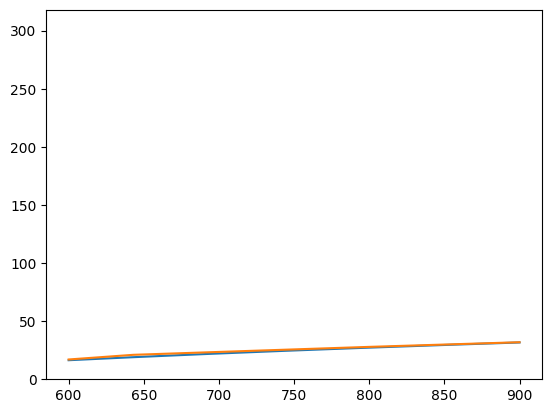

In [ ]:
plt.ylim([0,318])
_ = plt.plot(depth_arange, depth_peak_illum_idx[:,0,2,23])
_ = plt.plot(depth_arange, depth_peak_illum_idx_linear[:,0,2,23])

## Depth peak illum idx

### Figure visualization

In [21]:
vis_wvl_idx = np.array([4,14,24,34,44])

In [48]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# %matplotlib inline 

# fig_width, fig_height = 8, 5
# depths = np.array([600, 650, 700, 750, 800, 850, 900])
# indices = np.array([0, 50, 100, 150, 200, 250, 300])  # Indices corresponding to the depths

# between_bar_padding = 0.85
# within_bar_padding = 0.8

# fig = plt.figure(figsize=(fig_width, fig_height))
# fig.set_facecolor('white')
# ax = fig.add_subplot()

# px_idx = 4

# ax.grid(axis='y', color = 'lightgray')
# ax.set_axisbelow(True)

# x_range = np.zeros(shape=(7, 5))
# for idx, depth in enumerate(depths):
#     # sub_category = depth_peak_illum_idx[indices[idx], 2, :, px_idx]
#     sub_category = first_illum_idx[vis_wvl_idx, indices[idx], sample_pts[px_idx, 1], sample_pts[px_idx, 0]]
    
#     num_sub_category = len(sub_category)
    
#     colors = sns.color_palette('hls',num_sub_category) 
#     tick_coord = idx  # x-coordinate based on the main category (depth)
#     # width = 1 / (num_sub_category) * between_bar_padding  # Adjusted width calculation
#     width = between_bar_padding / num_sub_category
    
#     for i in range(num_sub_category):
#         ax.bar(tick_coord + width * i, illum_proj_px[np.array(sub_category[i], dtype = np.int16)], width * within_bar_padding,
#                color=colors[i], label=f"Sub-{i} at {depth}")  # You can customize the label as needed
    
#         x_range[idx, i] = (tick_coord + width * i)
        
# plt.xticks(np.arange(len(depths)), depths)
# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.67))
# plt.xlabel('depth[mm]', fontsize=18)
# plt.ylabel('projector pixel[px]', fontsize=18)

# min = illum_proj_px[np.array(first_illum_idx[vis_wvl_idx, indices[idx], sample_pts[px_idx, 1], sample_pts[px_idx, 0]], dtype = np.int16)].min()
# max = illum_proj_px[np.array(first_illum_idx[vis_wvl_idx, indices[idx], sample_pts[px_idx, 1], sample_pts[px_idx, 0]], dtype = np.int16)].max()

# plt.ylim([300, 640])
# # plt.ylim(min - 100, np.max(max + 100, 640))
# # plt.savefig('fig03.png', format='png', dpi=300)

# # Add the dotted lines
# for i in range(len(vis_wvl_idx)):
#     # ax.plot(x_range[:, i], depth_peak_illum_idx[indices, 2, i, px_idx], '--', color=colors[i], label='Dotted Line 1')
#     ax.plot(x_range[:, i], illum_proj_px[np.array(first_illum_idx[vis_wvl_idx[i], indices, sample_pts[px_idx, 1], sample_pts[px_idx, 0]], dtype = np.int16)], '--', color=colors[i], label='Dotted Line 1')

# ax.tick_params(axis='both', which='major', labelsize=15, length = 0)
# plt.yticks(np.arange((min - 100) - (min - 100) % 10, (max + 100) - (max + 100) % 10, 50))
# plt.ylim([330, 640])
# plt.savefig('depth_dispersion.png')
# plt.show()

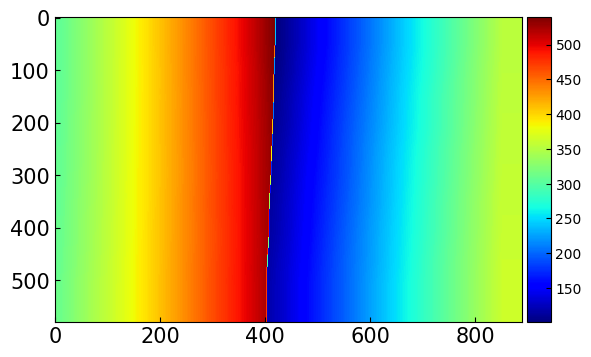

In [59]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# plt.figure()
# ax = plt.gca()
# im = ax.imshow(illum_proj_px[first_illum_idx[0, 100]], cmap = 'jet')
    
# # create an axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# ax.tick_params(axis='both', which='major', labelsize=15,direction='in')

# cbar = plt.colorbar(im, cax=cax)
# cbar.ax.tick_params(direction = 'in')

In [37]:
# mid3_peak_illum_idx

### Reprojection error calculation

(<matplotlib.image.AxesImage at 0x2af9c0ae6c8>,
 <matplotlib.colorbar.Colorbar at 0x2af9c0aebc8>)

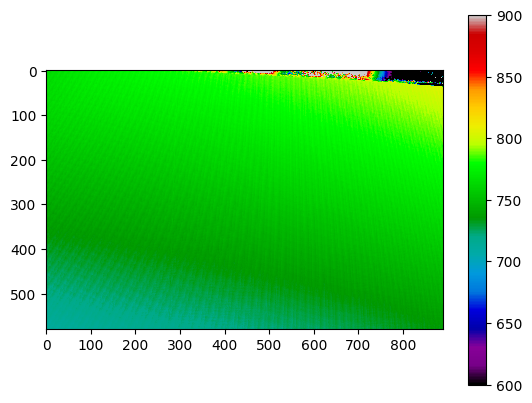

In [97]:
plt.imshow(depth[2].reshape(580,890), cmap = 'nipy_spectral', vmin = 600, vmax = 900), plt.colorbar()

In [98]:
mid2_peak_illum_idx.shape

(3, 7, 516200)

In [99]:
# illum index of m order, w wvls, sample points
mid2_sample_pts_peak_illum_idx = mid2_peak_illum_idx[:,:,sample_pts_flatt]
# mid_sample_pts_peak_illum_idx = mid_peak_illum_idx[:,:,sample_pts_flatt]

sample_pts_first_illum_idx = first_illum_idx[:,:,sample_pts[:,1], sample_pts[:,0]]
# depth_mid = depth[1,sample_pts_flatt]
depth_mid2 = depth[2,sample_pts_flatt]

In [100]:
sample_pts_first_illum_idx.shape, mid2_sample_pts_peak_illum_idx.shape, depth_mid2.shape
# sample_pts_first_illum_idx.shape, mid_sample_pts_peak_illum_idx.shape, depth_mid.shape

((47, 301, 150), (3, 7, 150), (150,))

In [101]:
mfirst_diff = abs(mid2_sample_pts_peak_illum_idx[0,0] - mid2_sample_pts_peak_illum_idx[0,-1])
pfirst_diff = abs(mid2_sample_pts_peak_illum_idx[2,0] - mid2_sample_pts_peak_illum_idx[2,-1])

# mfirst_diff = abs(mid_sample_pts_peak_illum_idx[0,0] - mid_sample_pts_peak_illum_idx[0,-1])
# pfirst_diff = abs(mid_sample_pts_peak_illum_idx[2,0] - mid_sample_pts_peak_illum_idx[2,-1])

In [102]:
depth_peak_illum_idx_final = np.zeros(shape=(2, len(wvl_list), sample_pts.shape[0])) 

In [103]:
pfirst_diff = pfirst_diff[np.newaxis,:]
mfirst_diff = mfirst_diff[np.newaxis,:]

# Further broadcast the masks to the shape of max_data
pfirst_diff = np.repeat(pfirst_diff, 7, axis=0)
mfirst_diff = np.repeat(mfirst_diff, 7, axis=0)

In [104]:
depth_peak_illum_idx_final = np.zeros(shape=(2, len(wvl_list), sample_pts.shape[0])) 

mfirst_diff = abs(mid2_sample_pts_peak_illum_idx[0,0] - mid2_sample_pts_peak_illum_idx[0,-1])
pfirst_diff = abs(mid2_sample_pts_peak_illum_idx[2,0] - mid2_sample_pts_peak_illum_idx[2,-1])

pfirst_diff = pfirst_diff[np.newaxis,:]
mfirst_diff = mfirst_diff[np.newaxis,:]

# Further broadcast the masks to the shape of max_data
pfirst_diff = np.repeat(pfirst_diff, 7, axis=0)
mfirst_diff = np.repeat(mfirst_diff, 7, axis=0)

# if difference of 430nm and 660nm is larger, take that first order
mask_pfirst = mfirst_diff <= pfirst_diff        
depth_peak_illum_idx_final[1][mask_pfirst] = mid2_sample_pts_peak_illum_idx[2][mask_pfirst]
depth_peak_illum_idx_final[1][mask_pfirst] = mid2_sample_pts_peak_illum_idx[2][mask_pfirst]

mask_mfirst = mfirst_diff > pfirst_diff
depth_peak_illum_idx_final[1][mask_mfirst] = mid2_sample_pts_peak_illum_idx[0][mask_mfirst]
depth_peak_illum_idx_final[1][mask_mfirst] = mid2_sample_pts_peak_illum_idx[0][mask_mfirst]
# input zero order
depth_peak_illum_idx_final[0] = mid2_sample_pts_peak_illum_idx[1].mean(axis = 0)[np.newaxis,:]

In [105]:
# depth_peak_illum_idx_final = np.zeros(shape=(2, len(wvl_list), sample_pts.shape[0])) 

# mfirst_diff = abs(mid_sample_pts_peak_illum_idx[0,0] - mid_sample_pts_peak_illum_idx[0,-1])
# pfirst_diff = abs(mid_sample_pts_peak_illum_idx[2,0] - mid_sample_pts_peak_illum_idx[2,-1])

# pfirst_diff = pfirst_diff[np.newaxis,:]
# mfirst_diff = mfirst_diff[np.newaxis,:]

# # Further broadcast the masks to the shape of max_data
# pfirst_diff = np.repeat(pfirst_diff, 7, axis=0)
# mfirst_diff = np.repeat(mfirst_diff, 7, axis=0)

# # if difference of 430nm and 660nm is larger, take that first order
# mask_pfirst = mfirst_diff <= pfirst_diff        
# depth_peak_illum_idx_final[1][mask_pfirst] = mid_sample_pts_peak_illum_idx[2][mask_pfirst]
# depth_peak_illum_idx_final[1][mask_pfirst] = mid_sample_pts_peak_illum_idx[2][mask_pfirst]

# mask_mfirst = mfirst_diff > pfirst_diff
# depth_peak_illum_idx_final[1][mask_mfirst] = mid_sample_pts_peak_illum_idx[0][mask_mfirst]
# depth_peak_illum_idx_final[1][mask_mfirst] = mid_sample_pts_peak_illum_idx[0][mask_mfirst]
# # input zero order
# depth_peak_illum_idx_final[0] = mid_sample_pts_peak_illum_idx[1].mean(axis = 0)[np.newaxis,:]

In [106]:
depth_peak_illum_idx_final.shape

(2, 7, 150)

In [107]:
# depth_mid_round = np.round(depth_mid).astype(np.int16)
depth_mid2_round = np.round(depth_mid2).astype(np.int16)

In [108]:
depth_arange = np.arange(600, 900 + 1, 1)
real_img_illum_idx = np.zeros(shape=(len(sample_pts_flatt),))

# for i in range(len(sample_pts_flatt)):
#         if (depth_mid_round[i] < 600) or (depth_mid_round[i] > 900):
#                 depth_mid_round[i] = 600
#         depth_idx = np.where(depth_arange == depth_mid_round[i])[0][0]
#         real_img_illum_idx[i]= first_illum_idx.reshape(47,301,580*890)[0, depth_idx, sample_pts_flatt[i]]

for i in range(len(sample_pts_flatt)):
        if (depth_mid2_round[i] < 600) or (depth_mid2_round[i] > 900):
                depth_mid2_round[i] = 600
        depth_idx = np.where(depth_arange == depth_mid2_round[i])[0][0]
        real_img_illum_idx[i]= first_illum_idx.reshape(47,301,580*890)[0, depth_idx, sample_pts_flatt[i]]

In [109]:
depth_peak_illum_idx_final.shape

(2, 7, 150)

In [110]:
depth_peak_illum_idx_final[1,0]

array([158., 175., 191., 208., 225., 242., 260.,  56.,  74.,  92., 110.,
       127., 145., 162., 180., 158., 174., 191., 207., 224., 242., 259.,
        57.,  75.,  93., 111., 128., 145., 163., 180., 158., 174., 191.,
       207., 224., 241., 259.,  58.,  76.,  94., 111., 129., 146., 163.,
       180., 159., 174., 190., 207., 224., 241., 258.,  59.,  77.,  95.,
       112., 129., 146., 164., 181., 159., 174., 190., 207., 223., 240.,
       258.,  60.,  78.,  96., 113., 130., 147., 164., 181., 159., 174.,
       190., 206., 223., 240., 257.,  62.,  79.,  96., 114., 131., 148.,
       164., 181., 159., 174., 190., 206., 223., 240., 257.,  63.,  80.,
        97., 114., 131., 148., 165., 181., 159., 174., 190., 206., 223.,
       239., 256.,  63.,  81.,  98., 115., 132., 149., 165., 182., 159.,
       175., 190., 206., 222., 239., 256.,  64.,  82.,  99., 115., 132.,
       149., 165., 182., 159., 175., 190., 206., 222., 239., 256.,  65.,
        82.,  99., 116., 133., 149., 165., 182.])

In [111]:
real_img_illum_idx

array([155., 171., 187., 204., 221., 238., 256.,  56.,  74.,  92., 109.,
       127., 145., 162., 179., 154., 171., 187., 203., 220., 238., 255.,
        57.,  75.,  92., 110., 128., 145., 163., 180., 155., 170., 187.,
       203., 220., 237., 255.,  58.,  76.,  94., 111., 129., 146., 163.,
       180., 155., 170., 187., 203., 220., 237., 254.,  59.,  77.,  95.,
       112., 129., 146., 164., 180., 155., 170., 186., 203., 219., 236.,
       254.,  60.,  78.,  96., 113., 130., 147., 164., 181., 155., 170.,
       187., 203., 219., 236., 253.,  62.,  79.,  96., 114., 131., 148.,
       164., 181., 155., 170., 186., 202., 219., 235., 252.,  63.,  80.,
        97., 114., 131., 148., 165., 181., 155., 170., 186., 202., 219.,
       235., 252.,  63.,  81.,  98., 115., 132., 148., 165., 181., 155.,
       170., 186., 202., 218., 235., 252.,  64.,  82.,  99., 115., 132.,
       149., 165., 182., 155., 171., 186., 202., 218., 235., 251.,  65.,
        82.,  99., 116., 132., 149., 165., 182.])

In [112]:
diff = abs(depth_peak_illum_idx_final[1,0] - real_img_illum_idx)

In [113]:
diff

array([3., 4., 4., 4., 4., 4., 4., 0., 0., 0., 1., 0., 0., 0., 1., 4., 3.,
       4., 4., 4., 4., 4., 0., 0., 1., 1., 0., 0., 0., 0., 3., 4., 4., 4.,
       4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 3., 4., 4., 4.,
       4., 0., 0., 0., 0., 0., 0., 0., 1., 4., 4., 4., 4., 4., 4., 4., 0.,
       0., 0., 0., 0., 0., 0., 0., 4., 4., 3., 3., 4., 4., 4., 0., 0., 0.,
       0., 0., 0., 0., 0., 4., 4., 4., 4., 4., 5., 5., 0., 0., 0., 0., 0.,
       0., 0., 0., 4., 4., 4., 4., 4., 4., 4., 0., 0., 0., 0., 0., 1., 0.,
       1., 4., 5., 4., 4., 4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
       4., 4., 4., 4., 4., 5., 0., 0., 0., 0., 1., 0., 0., 0.])

In [267]:
diff.sum() - (12+4+4+4), diff.shape

(142.0, (150,))

In [269]:
(diff.sum() - (12+4+4+4))/146

0.9726027397260274

In [47]:
diff.mean()

0.12

### diffs.npy

In [146]:
diffs = np.load(os.path.join(npy_dir, 'diffs.npy'))

49.936966701130174


(<matplotlib.image.AxesImage at 0x2ac31bb1e88>,
 <matplotlib.colorbar.Colorbar at 0x2ac32150d88>)

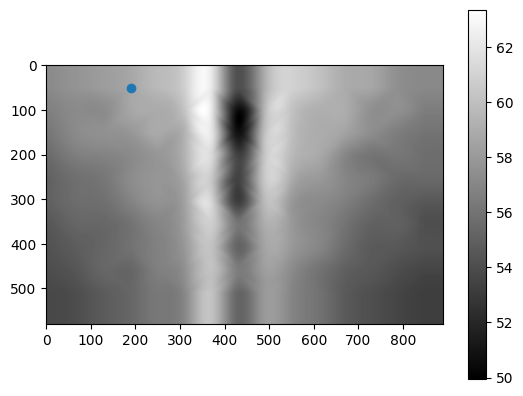

In [152]:
idx = 0

pts = 3
# plt.scatter(sample_pts[:,0],sample_pts[:,1])
plt.scatter(sample_pts[pts,0],sample_pts[pts,1])

print(diffs[idx].min())
plt.imshow(diffs[idx], cmap='gray'), plt.colorbar()

### diff interpolation

In [ ]:
from scipy.interpolate import griddata, NearestNDInterpolator

cam_H, cam_W = 580, 890
def interpolation_diff_image(sample_pts, difference_430nm_660nm):
    """
        interpolate difference of 430nm and 660nm
    """
    diff_image_illum_idx = np.zeros(shape=(cam_H, cam_W))

    # Create a mesh grid for the image dimensions
    grid_y, grid_x = np.mgrid[0:cam_H, 0:cam_W]

    # Use griddata to interpolate
    interp_values_diffs = griddata(sample_pts, difference_430nm_660nm, (grid_x, grid_y), method='linear')

    # Step 2: Enhance the set of points and values using interpolated results
    y_coords, x_coords = np.where(~np.isnan(interp_values_diffs))
    enhanced_points = np.column_stack((y_coords, x_coords))
    enhanced_values = interp_values_diffs[~np.isnan(interp_values_diffs)]

    # Step 3: Extrapolate using the enhanced set of points and values
    interpolator = NearestNDInterpolator(enhanced_points, enhanced_values)
    extrapolated_values = interpolator(grid_y, grid_x)

    # Assign the interpolated values to the image (assuming you want to assign them to the first channel)
    diff_image_illum_idx[:, :] = extrapolated_values

    return diff_image_illum_idx

### Depth peak illum debug

#### Depth peak illum index vs all position illum index

In [16]:
depth_peak_illum_idx = np.load(os.path.join(npy_dir,'depth_peak_illum_idx.npy'))

In [17]:
depth_arange = np.arange(600, 901, 1)
wvl = np.arange(430,661,5)

wvl = np.array([430,600,610,620,640,650,660])
depth_idx = np.array([50,100,150,200,250,300])

In [18]:
depth = np.round(depth).reshape(5, cam_H* cam_W).astype(np.int16)

In [72]:
# plt.ylim([0,318])

pts = 36
wvl = np.array([430,600,610,620,640,650,660])


# for pts in range(100,101):
#     for w_idx, wvls in enumerate(wvl):
#         for m_idx, m in enumerate([-1, 1]):

#             # Visualization            
#             plt.figure(figsize=(5, 3))
#             # plt.ylim([0, 318])
#             plt.scatter(depth[0,sample_pts_flatt[pts]],all_position_peak_illum_idx[0,m_idx,w_idx,sample_pts_flatt[pts]]), plt.title('%s order, %dnm, %d-th point'%(m, wvls, pts))
#             plt.scatter(depth[1,sample_pts_flatt[pts]],all_position_peak_illum_idx[1,m_idx,w_idx,sample_pts_flatt[pts]])
#             plt.scatter(depth[2,sample_pts_flatt[pts]],all_position_peak_illum_idx[2,m_idx,w_idx,sample_pts_flatt[pts]])
#             plt.scatter(depth[3,sample_pts_flatt[pts]],all_position_peak_illum_idx[3,m_idx,w_idx,sample_pts_flatt[pts]])
#             plt.scatter(depth[4,sample_pts_flatt[pts]],all_position_peak_illum_idx[4,m_idx,w_idx,sample_pts_flatt[pts]])

#             plt.plot(depth_arange, depth_peak_illum_idx[:,m_idx,w_idx,pts])
 
            
all_pos_list = []
depth_peak_list = []

for pts_idx, pts in enumerate(sample_pts_flatt):
    for i in range(2,3):
        # Depth illum index for points
        all_pos_list.append(all_position_peak_illum_idx[i,:,:,pts])
        depth_peak_list.append(depth_peak_illum_idx[np.where(depth_arange == depth[i, pts])[0][0],:,:,pts_idx])
all_pos_list = np.array(all_pos_list)
depth_peak_list = np.array(depth_peak_list)

In [76]:
depth_peak_illum_idx.shape

(301, 3, 7, 150)

In [75]:
depth_peak_list.shape, all_pos_list.shape, depth_peak_illum_idx.shape

((150, 3, 7), (150, 3, 7), (301, 3, 7, 150))

In [74]:
abs(all_pos_list - np.round(depth_peak_list)).mean()

0.17174603174603176

In [187]:
all_position_peak_illum_idx.shape, depth_peak_illum_idx.shape

((5, 3, 7, 516200), (301, 3, 7, 150))

In [1]:
# for m in range(3):
#     for w in range(7):
#         for p in range(150):
#             plt.ylim([0, 318])
#             plt.plot(depth_peak_illum_idx[:,m, w, p])
#             plt.scatter(np.where(depth_arange == depth[2:3,sample_pts_flatt[p]])[0], all_position_peak_illum_idx[2:3,m,w,sample_pts_flatt[p]])
#             break

In [63]:
depth_peak_illum_idx_final.shape, depth_peak_illum_idx.shape

((301, 3, 7, 150), (301, 3, 7, 150))

In [64]:
abs(depth_peak_illum_idx_final - depth_peak_illum_idx).sum()

458757.56092178624

#### Depth peak illum idx final vs first illum idx

In [51]:
first_illum_idx = np.load(os.path.join('../../dataset/image_formation/20231007/npy_data/first_illum_idx_final_transp_test_2.npy'))

In [62]:
depth_peak_illum_idx_final = np.load(os.path.join('../../dataset/image_formation/20231007/npy_data/depth_peak_illum_idx_final.npy'))

In [45]:
new_wvls = np.arange(430,661,5)
cal_wvl_idx = np.array([0,-13,-11,-9,-5,-3,-1])

In [52]:
first_illum_idx = first_illum_idx.transpose(1,0,2,3)[:,cal_wvl_idx]
first_illum_idx = first_illum_idx[:,:,sample_pts[:,1], sample_pts[:,0]]

In [47]:
first_illum_idx_list = []
depth_peak_illum_idx_final_list = []
for i in range(2,3):
    # Depth illum index for points
    first_illum_idx_list.append(first_illum_idx[np.where(depth_arange == depth[i, pts])[0][0]])
    depth_peak_illum_idx_final_list.append(depth_peak_illum_idx_final[np.where(depth_arange == depth[i, pts])[0][0], 1])
depth_peak_illum_idx_final_list = np.array(depth_peak_illum_idx_final_list)
first_illum_idx_list = np.array(first_illum_idx_list)

In [53]:
depth_peak_illum_idx_final.shape, first_illum_idx.shape

((301, 2, 7, 150), (301, 7, 150))

In [60]:
# depth_peak_illum_idx_final[:100,1,0,10], first_illum_idx[:100,0,10]

In [49]:
depth_peak_illum_idx_final_list.shape, first_illum_idx_list.shape

((1, 7, 150), (1, 7, 150))

In [169]:
# for i in range(len(depth_peak_list[:,0].flatten())):
#     print(abs((depth_peak_illum_idx_final_list - depth_peak_list[:,0]).flatten())[i])

In [50]:
abs(first_illum_idx_list-depth_peak_illum_idx_final_list).sum() / (7*150)

2.0135383098690998

### diff interpolation

In [ ]:
intp_diff[sample_pts[pts,1],sample_pts[pts,0]], pts

(54.39254270109814, 3)

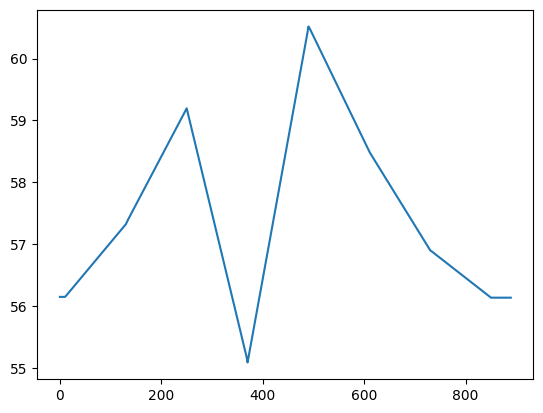

In [ ]:
plt.plot(intp_diff[100,:])

52.54692511388566


(<matplotlib.image.AxesImage at 0x2386952ab08>,
 <matplotlib.colorbar.Colorbar at 0x2386952a988>)

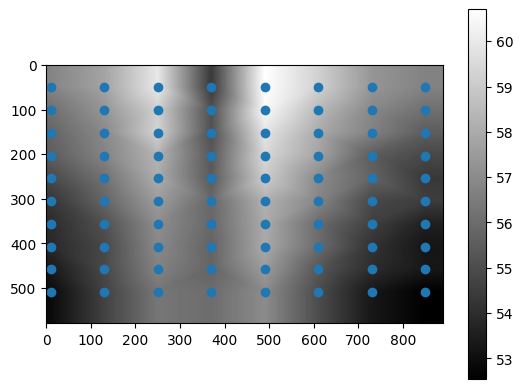

In [ ]:
print(intp_diff.min())
plt.scatter(sample_pts[:,0], sample_pts[:,1])
plt.imshow(intp_diff, cmap='gray'), plt.colorbar()

52.689753769860545


(<matplotlib.image.AxesImage at 0x238b7342948>,
 <matplotlib.colorbar.Colorbar at 0x238b71f4208>)

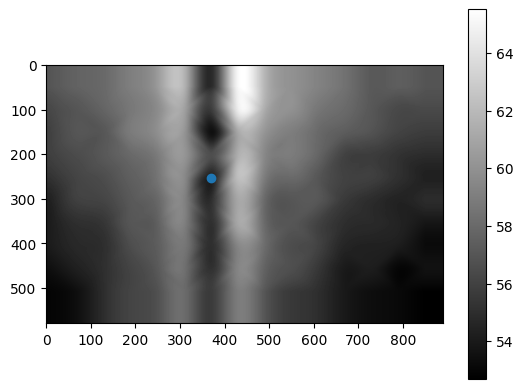

In [ ]:
idx = 300

pts = 66
# plt.scatter(sample_pts[:,0],sample_pts[:,1])
plt.scatter(sample_pts[pts,0],sample_pts[pts,1])

print(diffs[idx].min())
plt.imshow(diffs[idx], cmap='gray'), plt.colorbar()

### Peak image illum idx

In [ ]:
peak_image_illum_idx= np.load(os.path.join(npy_dir, 'peak_image_illum_idx.npy'))

In [ ]:
peak_image_illum_idx.shape

(301, 2, 516200, 2)

In [ ]:
peak_image_illum_idx_reshape = peak_image_illum_idx.reshape(301,2,580,890,2)

In [ ]:
peak_image_illum_idx_reshape[130,1,260,420]

array([56.19582909, -0.43562039])

In [ ]:
depth_peak_illum_idx_final

In [ ]:
a = np.load(os.path.join(npy_dir, 'depth_new_peak_image_illum_idx.npy'))

In [ ]:
a.max()

467.33623444649857

In [ ]:
a.shape

(301, 2, 516200, 2)

(<matplotlib.image.AxesImage at 0x1943e9fb108>,
 <matplotlib.colorbar.Colorbar at 0x1943ea1aac8>)

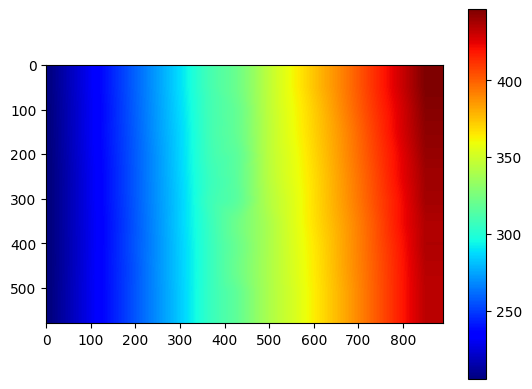

In [ ]:
plt.imshow(a.reshape(301,2,580,890,2)[0, 1, :,:, 1], cmap = 'jet'), plt.colorbar()